In [58]:
import torch 
from torch.optim import Adam
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from torchinfo import summary
import numpy as np

Data Processing with Pandas

In [59]:
df = pd.read_csv('riceClassification.csv')
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [60]:
df.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [61]:
df.shape

(18185, 12)

In [62]:
df.dtypes

id                   int64
Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class                int64
dtype: object

In [63]:
df.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [64]:
df.isna().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df['Class'].unique()

array([1, 0])

<Axes: title={'center': 'Data Distribution for the various classes'}, xlabel='Class'>

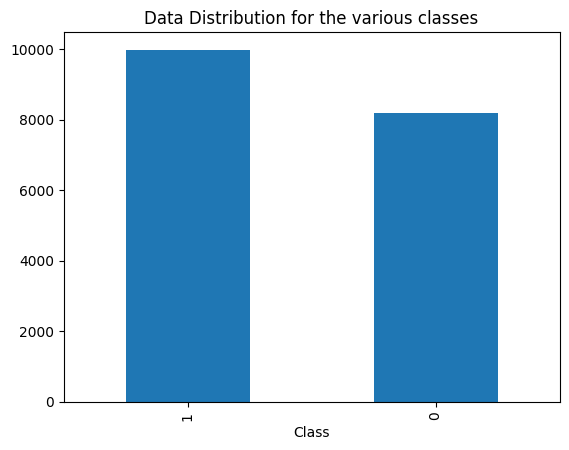

In [67]:
df['Class'].value_counts().plot(kind='bar',title='Data Distribution for the various classes')

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18185.0,9093.000000,5249.701658,1.000000,4547.000000,9093.000000,13639.000000,18185.000000
Area,18185.0,7036.492989,1467.197150,2522.000000,5962.000000,6660.000000,8423.000000,10210.000000
MajorAxisLength,18185.0,151.680754,12.376402,74.133114,145.675910,153.883750,160.056214,183.211434
MinorAxisLength,18185.0,59.807851,10.061653,34.409894,51.393151,55.724288,70.156593,82.550762
Eccentricity,18185.0,0.915406,0.030575,0.676647,0.891617,0.923259,0.941372,0.966774
ConvexArea,18185.0,7225.817872,1502.006571,2579.000000,6125.000000,6843.000000,8645.000000,11008.000000
EquivDiameter,18185.0,94.132952,9.906250,56.666658,87.126656,92.085696,103.559146,114.016559
Extent,18185.0,0.616653,0.104389,0.383239,0.538530,0.601194,0.695664,0.886573
Perimeter,18185.0,351.606949,29.500620,197.015000,333.990000,353.088000,373.003000,508.511000
Roundness,18185.0,0.707998,0.067310,0.174590,0.650962,0.701941,0.769280,0.904748


Splitting the Dataset 

In [69]:
df.drop(['id'],inplace=True,axis=1)

In [70]:
X = np.array(df.iloc[0:,0:-1])

In [71]:
y = np.array(df['Class'])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)
print(f'{round(X_train.shape[0]/X.shape[0]*100)} Percent of the data is for training')
print(f'{round(X_test.shape[0]/X.shape[0]*100)} Percent of the data is for testing')
print(f'{round(X_val.shape[0]/X.shape[0]*100)} Percent of the data is for Validation')

70 Percent of the data is for training
15 Percent of the data is for testing
15 Percent of the data is for Validation


Dataset and Dataloader

In [73]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
print(device)
class DataPrep(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x,dtype=torch.float64).to(device)
        self.y = torch.tensor(y,dtype=torch.float64).to(device)

    def __getitem__(self, index):
        return (self.x[index],self.y[index])
    
    def __len__(self):
        return len(self.x.shape)
        

cuda


In [74]:
training_data = DataPrep(X_train,y_train)
testing_data = DataPrep(X_test,y_test)
validation_data = DataPrep(X_val,y_val)

In [75]:
batch_size = 16

In [76]:
training_data_loader = DataLoader(training_data,shuffle=True,batch_size=batch_size)
testing_data_loader = DataLoader(testing_data,shuffle=True,batch_size=batch_size)
validation_data_loader = DataLoader(validation_data,shuffle=True,batch_size=batch_size)

In [77]:
print(next(iter(testing_data_loader)))

[tensor([[5.5140e+03, 1.5392e+02, 4.6455e+01, 9.5337e-01, 5.6910e+03, 8.3789e+01,
         6.5208e-01, 3.4334e+02, 5.8778e-01, 3.3134e+00],
        [8.7370e+03, 1.5977e+02, 7.0176e+01, 8.9838e-01, 8.9470e+03, 1.0547e+02,
         7.7291e-01, 3.8522e+02, 7.3988e-01, 2.2767e+00]], device='cuda:0',
       dtype=torch.float64), tensor([1., 0.], device='cuda:0', dtype=torch.float64)]


Creating Model

In [78]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        
        self.input_layer = nn.Linear(input_dim, 20)
        self.hidden_layer_1 = nn.Linear(20, 10)
        self.hidden_layer_2 = nn.Linear(10, 1)
 
        
        self.activation_hidden = nn.ReLU()    # good for hidden layers
        self.activation_output = nn.Sigmoid() # good for binary output

    def forward(self, x):
        x = self.activation_hidden(self.input_layer(x))
        x = self.activation_hidden(self.hidden_layer_1(x))
        x = self.activation_output(self.hidden_layer_2(x))
        return x


In [ ]:
model = Model(input_dim=X.shape[1]).double().to(device)
summary(model, (X.shape[1],), dtypes=[torch.float64])

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [1]                       --
├─Linear: 1-1                            [20]                      220
├─ReLU: 1-2                              [20]                      --
├─Linear: 1-3                            [10]                      210
├─ReLU: 1-4                              [10]                      --
├─Linear: 1-5                            [1]                       11
├─Sigmoid: 1-6                           [1]                       --
Total params: 441
Trainable params: 441
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

Configuring hyperparameters and Loss Function

In [80]:
learning_rate = 1e-3
epochs = 20
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(),lr=learning_rate)

In [85]:
for epoch in range(epochs):
    total_loss_train = 0
    epoch_correct = 0
    epoch_total = 0

    for data in training_data_loader:
        inputs,label = data 

        prediction = model(inputs).squeeze(1)
        correct = (prediction.round() == label).sum().item()
        epoch_correct += correct
        total = label.size(0)
        epoch_total += total

        batch_loss = criterion(prediction,label)
        total_loss =+ batch_loss.item()
        
        acc = epoch_correct / epoch_total

        batch_loss.backward()
        optimizer.zero_grad()
        optimizer.step()

    print(f'Epoch: {epoch +1}||{epochs}  Total Loss: {total_loss}  Accuracy: {acc}')

Epoch: 1||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 2||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 3||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 4||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 5||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 6||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 7||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 8||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 9||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 10||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 11||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 12||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 13||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 14||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 15||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 16||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 17||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 18||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 19||20  Total Loss: 100.0  Accuracy: 0.0
Epoch: 20||20  Total Loss: 100.0  Accuracy: 0.0
